In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle5 as pickle
from scipy.stats import gaussian_kde
import matplotlib as mpl
from abcpy.output import Journal


/home/minny/anaconda3/envs/GBLFI-final/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
params = {
   'text.usetex': False,
   'figure.figsize': [6.4, 4],
    'font.size': 9,
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'legend.fontsize':15,
    'legend.title_fontsize': 9,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
   }

In [3]:
# List of n_obs values
n_obs_list = [10,20,50,70,100,150,200]

# List to store the samples
samples_list = []
fp = './bsl_exp_with_summary_stats/'
# Loop through each n_obs value
for n_obs in n_obs_list:
    # Construct the filename
    filename = fp + f"bsl_res_{n_obs}.npy"
    
    try:
        # Load the .npy file
        samples = np.load(filename)
        # Append the samples to the list
        samples_list.append(samples)
    except FileNotFoundError:
        print(f"File not found for n_obs = {n_obs}")

In [4]:
fp = './bsl_exp/'

exp_num=1
score_name = 'bsl'
output_samples = []
for i in [1,5,10,50,100,500]:
    file_path = fp + f"SyntheticLikelihood_MCMC_burnin_0_n-samples_110000_n-sam-per-param_500_n-sam-in-obs_{i}.jnl"
    output_samples.append(np.array(Journal.fromFile(file_path).get_accepted_parameters()).reshape(110000,5))

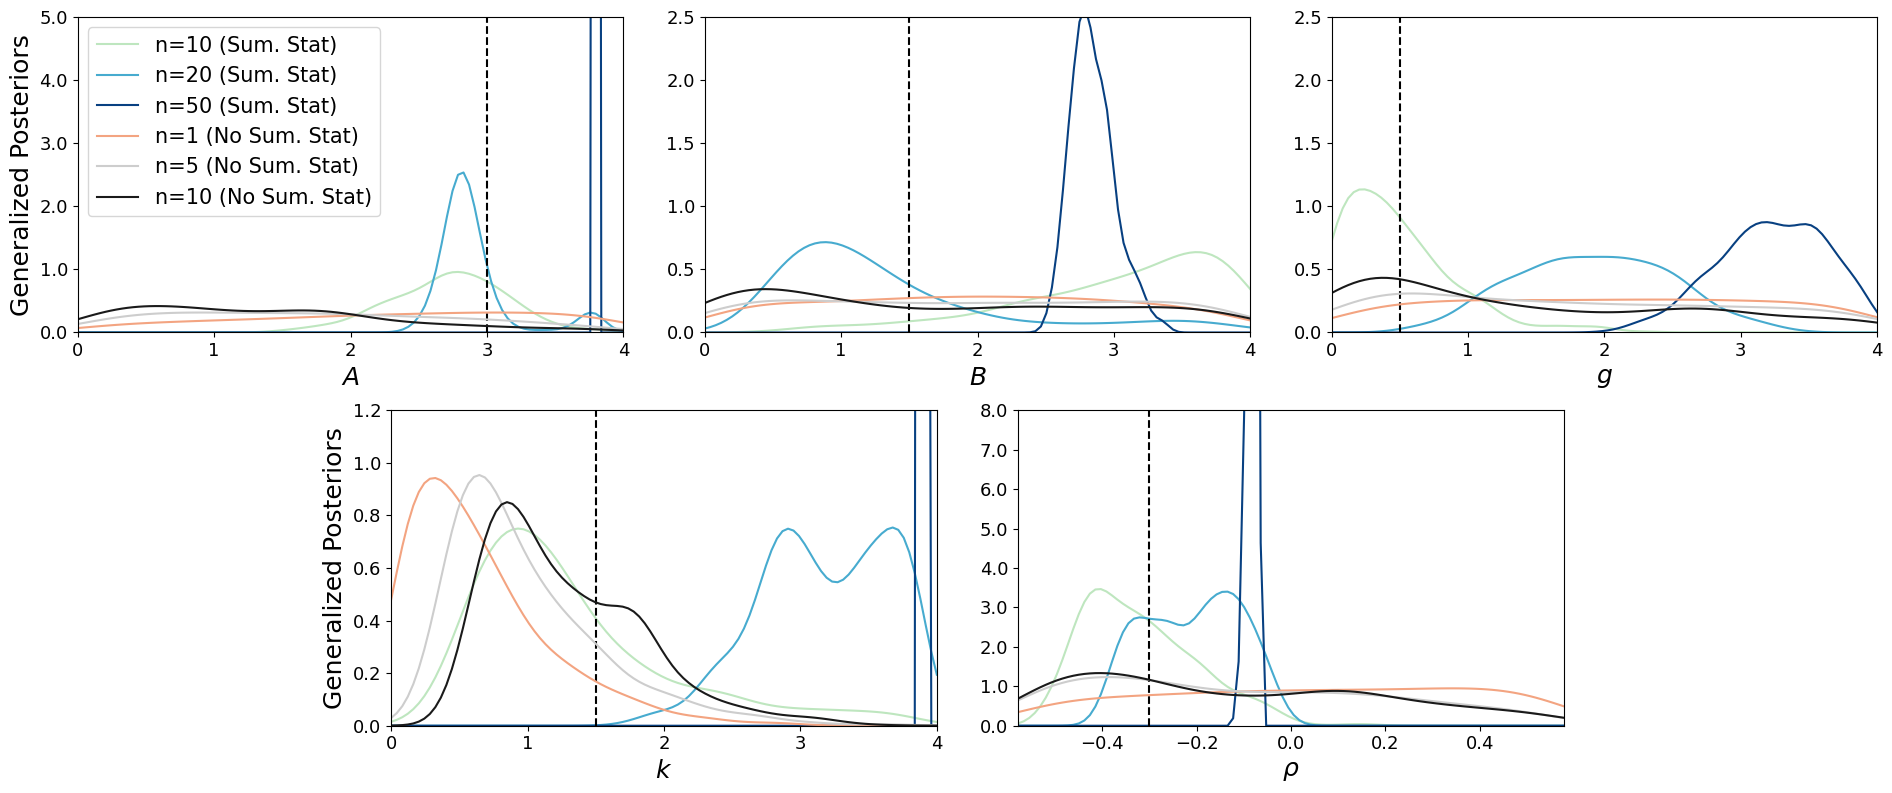

In [5]:
from matplotlib.ticker import FormatStrFormatter

#y_maxes = [15,6,15,15,20]
y_maxes = [5.0,2.5,2.5,1.2,8.0]
#y_maxes = [8.0,2.5,2.5,3.2,8.0]


with mpl.rc_context(params):
    smoothing = 0.3
    mid = [3.0,1.5,0.5,1.5,-0.3]
    fig = plt.figure(figsize=(19,8))

    spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

    ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
    ax2 = fig.add_subplot(spec[0,2:4])
    ax3 = fig.add_subplot(spec[0,4:])
    ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
    ax5 = fig.add_subplot(spec[1,3:5])#fig.set_size_inches(45, 10.5)
    axs = [ax1,ax2,ax3,ax4,ax5]
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$',r'$\rho$']
    obs_num = [10,20,50]#,70,100,150,200,400]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        axs[idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        for obs_idx in range(len(obs_num)):
            post_samples = samples_list[obs_idx][:,idx]
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]} (Sum. Stat)")

        if idx == 4:
            axs[idx].set_xlim([-0.578,.578])
        else:
            axs[idx].set_xlim([0,4])
            axs[idx].get_xaxis().set_ticks(range(0,5))
            
        axs[idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[idx].set_ylabel('') 

        axs[idx].set_xlabel(xlab_leg[idx])
        axs[idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[0].legend(loc='upper left')

    

    obs_num = [1,5,10]
    colors = mpl.cm.RdGy(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)
    smoothing = 0.3
    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        for obs_idx in range(3):
            post_samples = output_samples[obs_idx][10000:,idx]
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]} (No Sum. Stat)")

        #axs[idx].set_xlabel(xlab_leg[idx])
        #axs[idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[0].legend(loc='upper left')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior BSL well-specified multivariate g-and-k concentration.pdf", bbox_inches='tight')
    #plt.show()

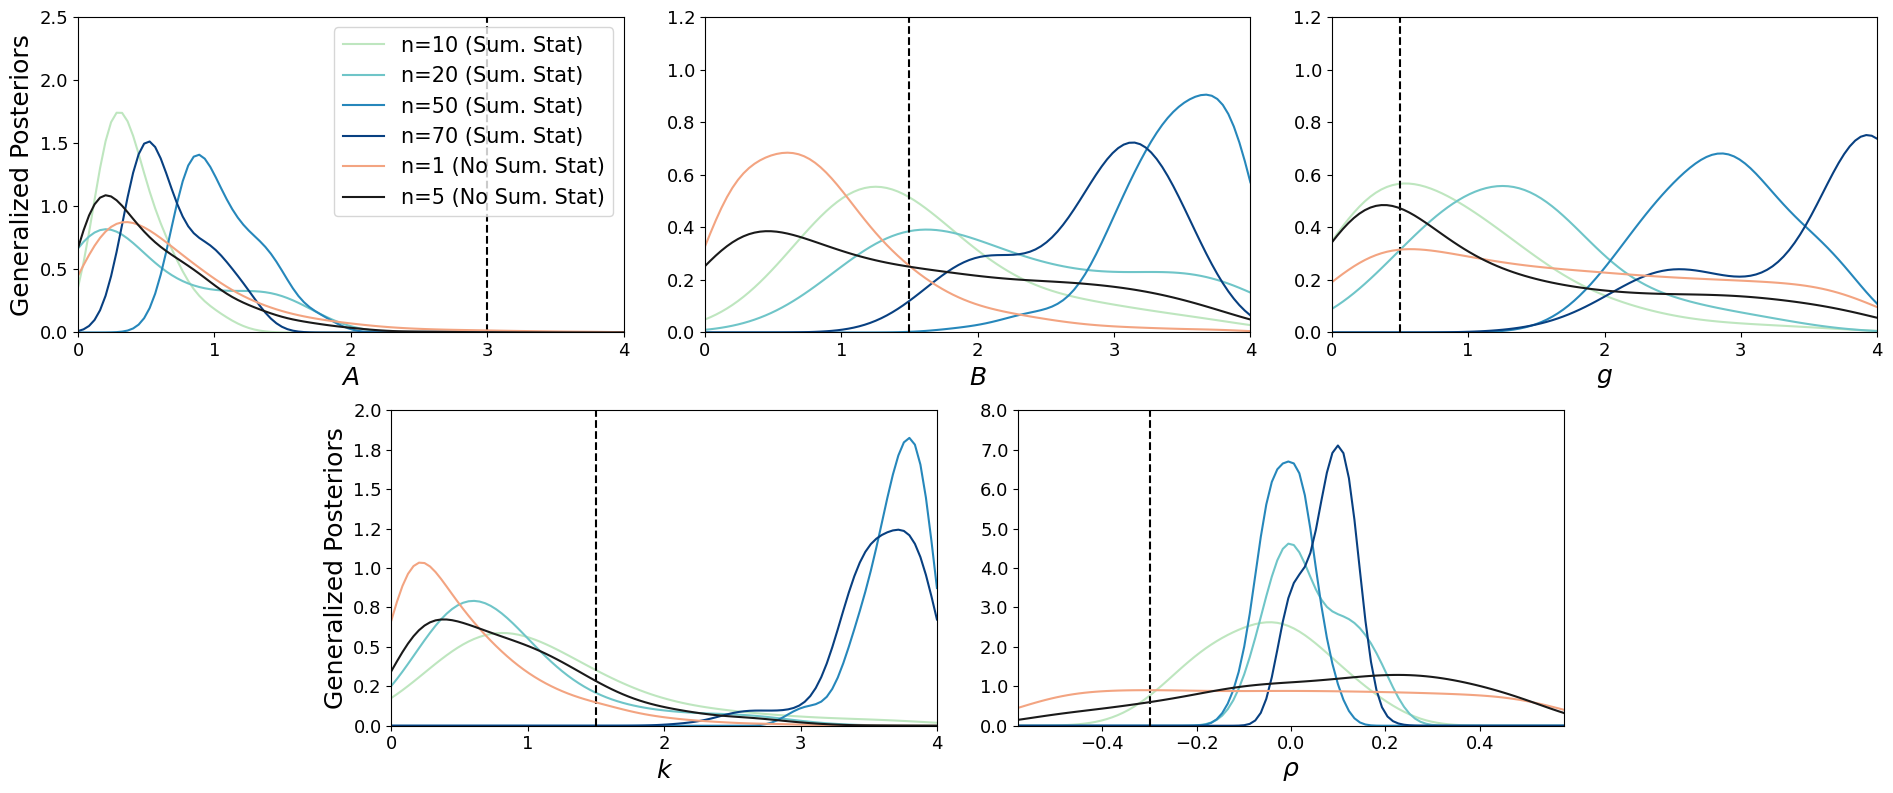

In [6]:
# List of n_obs values
n_obs_list = [10, 20, 50, 70]

# List to store the samples
samples_list = []
fp = './bsl_exp_miss_with_summary_stats/'
# Loop through each n_obs value
for n_obs in n_obs_list:
    # Construct the filename
    filename = fp + f"bsl_miss_res_{n_obs}.npy"
    
    try:
        # Load the .npy file
        samples = np.load(filename)
        
        # Append the samples to the list
        samples_list.append(samples)
    except FileNotFoundError:
        print(f"File not found for n_obs = {n_obs}")

fp = './bsl_exp_miss/'
exp_num=1
score_name = 'bsl'
output_samples = []
for i in [1,5]:
    file_path = fp + f"SyntheticLikelihood_MCMC_burnin_0_n-samples_110000_n-sam-per-param_500_n-sam-in-obs_{i}.jnl"
    output_samples.append(np.array(Journal.fromFile(file_path).get_accepted_parameters()).reshape(110000,5))
from matplotlib.ticker import FormatStrFormatter

#y_maxes = [15,6,15,15,20]
y_maxes = [2.5,1.2,1.2,2.0,8.0]


with mpl.rc_context(params):
    smoothing = 0.5
    mid = [3.0,1.5,0.5,1.5,-0.3]
    fig = plt.figure(figsize=(19,8))

    spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

    ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
    ax2 = fig.add_subplot(spec[0,2:4])
    ax3 = fig.add_subplot(spec[0,4:])
    ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
    ax5 = fig.add_subplot(spec[1,3:5])#fig.set_size_inches(45, 10.5)
    axs = [ax1,ax2,ax3,ax4,ax5]
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$',r'$\rho$']
    obs_num = [10,20,50,70]#,100,150]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        axs[idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        for obs_idx in range(len(samples_list)):
            post_samples = samples_list[obs_idx][500:,idx]
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]} (Sum. Stat)")

        if idx == 4:
            axs[idx].set_xlim([-0.578,.578])
        else:
            axs[idx].set_xlim([0,4])
            axs[idx].get_xaxis().set_ticks(range(0,5))
            
        axs[idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[idx].set_ylabel('') 

        axs[idx].set_xlabel(xlab_leg[idx])
        axs[idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[0].legend(loc='upper right')

    

    obs_num = [1,5]
    colors = mpl.cm.RdGy(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)
    smoothing = 0.3
    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        for obs_idx in range(2):
            post_samples = output_samples[obs_idx][10000:,idx]
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]} (No Sum. Stat)")

        #axs[idx].set_xlabel(xlab_leg[idx])
        #axs[idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[0].legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior BSL misspec. multivariate g-and-k concentration.pdf", bbox_inches='tight')
    #plt.show()